<a href="https://colab.research.google.com/github/alwaleedkhalidb/BusinessCommunicationSofttware/blob/main/21F22253_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/MyDrive/21F22253/train'
test_dir = '/content/drive/MyDrive/21F22253/test'

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/21F22253/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/21F22253/train/notpizza')))
print(len(os.listdir('/content/drive/MyDrive/21F22253/test/pizza')))
print(len(os.listdir('/content/drive/MyDrive/21F22253/test/notpizza')))

1033
1083
100
100


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1694 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [9]:
history = model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 303s 6s/step - accuracy: 0.8296 - loss: 0.3756 - val_accuracy: 0.6777 - val_loss: 0.6819
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 340s 6s/step - accuracy: 0.8791 - loss: 0.3018 - val_accuracy: 0.7085 - val_loss: 0.6868
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 301s 6s/step - accuracy: 0.8926 - loss: 0.2548 - val_accuracy: 0.6943 - val_loss: 0.7078
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 302s 6s/step - accuracy: 0.9060 - loss: 0.2357 - val_accuracy: 0.7393 - val_loss: 0.7005
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 301s 6s/step - accuracy: 0.9169 - loss: 0.1773 - val_accuracy: 0.7038 - val_loss: 0.8146
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 301s 6s/step - accuracy: 0.9231 - loss: 0.1769 - val_accuracy: 0.6919 - val_loss: 0.8005
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 303s 6s/step - accuracy: 0.9230 - loss: 0.1690 - val_accuracy: 0.6825 - val_loss: 0.8946
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 338s 6s/step - accuracy: 0.9351 - loss: 0.1549 - val_accuracy: 0.6848 - v

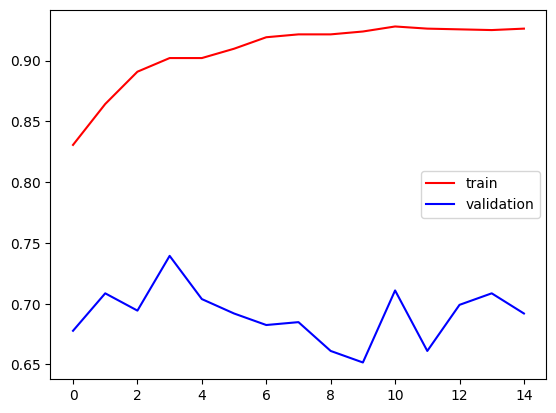

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

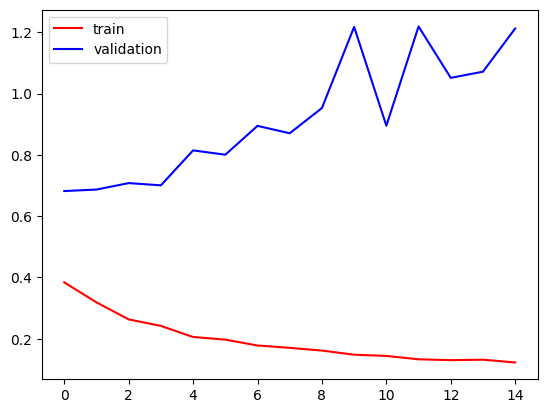

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [13]:
#predicting the test pizza/not pizza data
predictions = model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

# Calculating confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Printing confusion matrix
print("Confusion Matrix:")
print(cm)

# Printing the classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[76 24]
 [80 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.76      0.59       100
           1       0.45      0.20      0.28       100

    accuracy                           0.48       200
   macro avg       0.47      0.48      0.44       200
weighted avg       0.47      0.48      0.44       200



In [18]:
# apply BatchNormalization and Dropout with adjustments to fit for underfitting
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Create CNN model
model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Additional Layer for Complexity
model.add(Conv2D(256, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))  # Reduced dropout
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile Model
optimizer = Adam(learning_rate=0.0001)  # Reduced learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 546s 10s/step - accuracy: 0.6298 - loss: 0.7438 - val_accuracy: 0.4882 - val_loss: 0.7456
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 537s 10s/step - accuracy: 0.7944 - loss: 0.4401 - val_accuracy: 0.4905 - val_loss: 0.7678
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 522s 10s/step - accuracy: 0.8443 - loss: 0.3584 - val_accuracy: 0.5308 - val_loss: 0.7822
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 526s 10s/step - accuracy: 0.8976 - loss: 0.2921 - val_accuracy: 0.5118 - val_loss: 1.4985
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 526s 10s/step - accuracy: 0.8810 - loss: 0.3138 - val_accuracy: 0.5142 - val_loss: 1.2545
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 537s 10s/step - accuracy: 0.8680 - loss: 0.3288 - val_accuracy: 0.5118 - val_loss: 2.2618
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 545s 10s/step - accuracy: 0.9139 - loss: 0.2362 - val_accuracy: 0.5332 - val_loss: 1.4881
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 523s 10s/step - accuracy: 0.9283 - loss: 0.2137 - val_accuracy: 0.

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [21]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

# Calculating hte confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Printing the confusion matrix
print("Confusion Matrix:")
print(cm)

# Printing the classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[78 22]
 [78 22]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.50      0.78      0.61       100
           1       0.50      0.22      0.31       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.46       200
weighted avg       0.50      0.50      0.46       200



In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max',
                                                # Remove classes argument when include_top=False
                                                # classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

# Compile the model with appropriate metrics
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy',
                    metrics=['binary_accuracy'])  # Use binary_accuracy for binary classification

In [30]:
history = resnet_model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 588s 11s/step - binary_accuracy: 0.5281 - loss: 3.1186 - val_binary_accuracy: 0.5640 - val_loss: 0.7600
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 591s 11s/step - binary_accuracy: 0.5731 - loss: 0.8027 - val_binary_accuracy: 0.6730 - val_loss: 0.6035
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 589s 11s/step - binary_accuracy: 0.6280 - loss: 0.6494 - val_binary_accuracy: 0.6896 - val_loss: 0.5970
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 592s 11s/step - binary_accuracy: 0.6864 - loss: 0.6085 - val_binary_accuracy: 0.7204 - val_loss: 0.5756
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 565s 11s/step - binary_accuracy: 0.7179 - loss: 0.5712 - val_binary_accuracy: 0.7299 - val_loss: 0.5637
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 624s 11s/step - binary_accuracy: 0.6651 - loss: 0.6046 - val_binary_accuracy: 0.5877 - val_loss: 0.7280
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 623s 11s/step - binary_accuracy: 0.6174 - loss: 0.6772 - val_binary_accuracy: 0.7536 - val_loss: 0.5421
Epoch 

In [31]:
predictions = resnet_model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 65s 9s/step


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculating the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Printing the confusion matrix
print("Confusion Matrix:")
print(cm)

# Printing the classification report
print("Classification Report after applying techniques to handle underfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[84 16]
 [80 20]]
Classification Report after applying techniques to handle underfitting:
              precision    recall  f1-score   support

           0       0.51      0.84      0.64       100
           1       0.56      0.20      0.29       100

    accuracy                           0.52       200
   macro avg       0.53      0.52      0.47       200
weighted avg       0.53      0.52      0.47       200

